# <center>我国城市空气污染和烟花燃放的关系分析<center>

通过对全国城市空气质量文件（AQI_Data.csv）中的city、AQI(空气质量指数)、PM2.5、PM10、SO2、NO2、CO、O3、等的的统计，综合运用csv文件读取，pandas、numpy数据处理和pyecharts绘图功能，全面掌握Python程序设计与数据处理方法，从而使读者具备大数据处理的基本能力。

# 1 分析目标

1.春节期间，燃放烟花对空气质量的影响程度。  
2.春节期间，燃放烟花炮竹造成污染的主要污染物。   
3.春节期间，平均空气质量污染程度严重的前10个城市是哪些？    
4.春节期间，全国各大城市的平均空气质量分布。  

# 2 分析内容

全国城市空气质量文件（AQI_Data.csv）中包含city	AQI(空气质量指数)、PM2.5、PM10、SO2、NO2、CO、O3、main_pollution、time等信息。首先读取全部信息，删除空气质量为空的行；在替换'—'为0；对是数字的object类型转换为float；接着对提取干净信息进行统计分析，最后生成相应的统计图。

# 3 分析步骤

## 3.1 csv文件信息读取

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Geo,Line,Bar,Pie
from pyecharts.globals import ChartType
from pyecharts.globals import ThemeType
from pyecharts.globals import RenderType
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置显示中文字体

In [3]:
#pd.set_option('display.max_rows', None)
data=pd.read_csv("AQI_Data.csv",encoding='utf-8')
data2=pd.read_csv("全国城市经纬度.csv",encoding='utf-8')
#天气数据
data

,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,main_pollution,time
0,北京市,61,14,71,3,12,0.3,61,PM10,2019-02-04 00:00:00
1,天津市,104,41,157,8,21,0.9,53,PM10,2019-02-04 00:00:00
2,石家庄市,125,36,200,12,47,0.9,30,PM10,2019-02-04 00:00:00
3,唐山市,66,42,81,22,16,1.0,52,PM10,2019-02-04 00:00:00
4,秦皇岛市,55,25,60,12,22,0.9,48,PM10,2019-02-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...
71820,伊犁哈萨克州,108,81,79,26,35,1.4,66,PM2.5,2019-02-12 09:00:00
71821,塔城地区,28,19,23,3,11,1.1,69,—,2019-02-12 09:00:00
71822,阿勒泰地区,18,4,—,1,9,1.0,56,—,2019-02-12 09:00:00
71823,石河子市,252,202,223,15,38,1.4,46,PM2.5,2019-02-12 09:00:00


In [4]:
#城市坐标数据
data

,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,main_pollution,time
0,北京市,61,14,71,3,12,0.3,61,PM10,2019-02-04 00:00:00
1,天津市,104,41,157,8,21,0.9,53,PM10,2019-02-04 00:00:00
2,石家庄市,125,36,200,12,47,0.9,30,PM10,2019-02-04 00:00:00
3,唐山市,66,42,81,22,16,1.0,52,PM10,2019-02-04 00:00:00
4,秦皇岛市,55,25,60,12,22,0.9,48,PM10,2019-02-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...
71820,伊犁哈萨克州,108,81,79,26,35,1.4,66,PM2.5,2019-02-12 09:00:00
71821,塔城地区,28,19,23,3,11,1.1,69,—,2019-02-12 09:00:00
71822,阿勒泰地区,18,4,—,1,9,1.0,56,—,2019-02-12 09:00:00
71823,石河子市,252,202,223,15,38,1.4,46,PM2.5,2019-02-12 09:00:00


## 3.2数据清洗

替换—为0

In [5]:
data.replace("—","0",inplace=True)

删除空气质量为空的行：

In [6]:
data.drop(data[data.AQI=="0"].index,inplace=True)

类型转换

In [7]:
data['AQI']=data['AQI'].astype('float')
data['PM2.5']=data['PM2.5'].astype('float')
data['PM10']=data['PM10'].astype('float')
data['SO2']=data['SO2'].astype('float')
data['NO2']=data['NO2'].astype('float')
data['CO']=data['CO'].astype('float')
data['O3']=data['O3'].astype('float')

清洗后的数据以及数据类型：

In [8]:
data


,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,main_pollution,time
0,北京市,61.0,14.0,71.0,3.0,12.0,0.3,61.0,PM10,2019-02-04 00:00:00
1,天津市,104.0,41.0,157.0,8.0,21.0,0.9,53.0,PM10,2019-02-04 00:00:00
2,石家庄市,125.0,36.0,200.0,12.0,47.0,0.9,30.0,PM10,2019-02-04 00:00:00
3,唐山市,66.0,42.0,81.0,22.0,16.0,1.0,52.0,PM10,2019-02-04 00:00:00
4,秦皇岛市,55.0,25.0,60.0,12.0,22.0,0.9,48.0,PM10,2019-02-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...
71820,伊犁哈萨克州,108.0,81.0,79.0,26.0,35.0,1.4,66.0,PM2.5,2019-02-12 09:00:00
71821,塔城地区,28.0,19.0,23.0,3.0,11.0,1.1,69.0,0,2019-02-12 09:00:00
71822,阿勒泰地区,18.0,4.0,0.0,1.0,9.0,1.0,56.0,0,2019-02-12 09:00:00
71823,石河子市,252.0,202.0,223.0,15.0,38.0,1.4,46.0,PM2.5,2019-02-12 09:00:00


In [9]:
data.dtypes

city               object
AQI               float64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
main_pollution     object
time               object
dtype: object

## 3.3数据分析

## 3.3.1对全国所有城市春节期间的时间段的平均空气质量进行统计

空气质量等级划分如图所示：

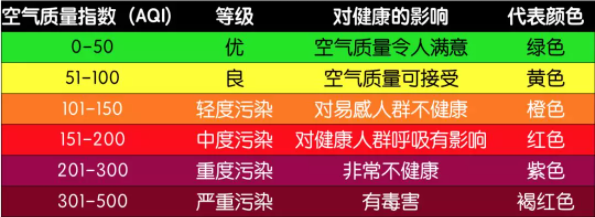

按时间分组获取的空气质量平均值，然后在四舍五入，获得统计后的数据：

In [10]:
#按时间分组获取的空气质量平均值
data_goal1=data.groupby('time').agg({'AQI':np.average})
#四舍五入
data_goal1['AQI']=data_goal1['AQI'].round()
data_goal1

,AQI
time,
2019-02-04 00:00:00,95.0
2019-02-04 01:00:00,95.0
2019-02-04 02:00:00,93.0
2019-02-04 03:00:00,92.0
2019-02-04 04:00:00,90.0
...,...
2019-02-12 05:00:00,76.0
2019-02-12 06:00:00,75.0
2019-02-12 07:00:00,75.0


## 3.3.2对各个时间段各大城市的首要污染物进行统计

以首要污染物分组获取的首要污染物占比数量，清除没有首要污染物的数据,获得统计后的数据：

In [11]:
#以首要污染物分组获取的首要污染物占比数量
data_goal2=data.groupby('main_pollution').agg({'main_pollution':np.count_nonzero})
#清除没有首要污染物的数据
data_goal2.drop(data_goal2[data_goal2.index=="0"].index,inplace=True)
data_goal2.index.name='污染物类型'
data_goal2

,main_pollution
污染物类型,
CO,2
O3,4
PM10,14298
"PM10,PM2.5",585
PM2.5,28549
SO2,16


## 3.3.3平均空气质量污染程度严重的前10个城市进行数据统计

In [12]:
#按城市分组获取的空气质量平均值
data_goal3=data.groupby('city').agg({'AQI':np.average})
#四舍五入
data_goal3['AQI']=data_goal3['AQI'].round()
#通过空气质量进行降序
data_goal3.sort_values(by='AQI',inplace=True,ascending=False)
#获取排名靠后的十个的城市
data_goal3=data_goal3.head(10)
data_goal3

,AQI
city,
喀什地区,281.0
阿克苏地区,234.0
库尔勒市,222.0
昌吉州,203.0
和田地区,199.0
石河子市,187.0
五家渠市,181.0
咸阳市,176.0
乌鲁木齐市,169.0


## 3.3.4对各城市春节时间段的平均空气质量进行统计

按城市分组获取的空气质量平均值，获得统计后的数据：

In [13]:
#按城市分组获取的空气质量平均值
data_goal4=data.groupby('city').agg({'AQI':np.average})
data_goal4['AQI']=data_goal4['AQI'].round()
data_goal4

,AQI
city,
七台河市,67.0
三亚市,25.0
三明市,33.0
三门峡市,110.0
上海市,52.0
...,...
黔东南州,38.0
黔南州,34.0
黔西南州,42.0


# 4绘图并分析

通过对全国所有城市春节期间的时间段的平均空气质量进行统计，绘制折线图：

In [14]:
line=Line(
    init_opts=opts.InitOpts(width="900px",
                            height="500px",
                            renderer=RenderType.SVG,
                            theme=ThemeType.LIGHT)
    )
line.add_xaxis(data_goal1.index.tolist())
line.add_yaxis(series_name="AQI",
               y_axis=data_goal1['AQI'].tolist(),
               symbol='diamond',
               symbol_size=10,
               is_smooth=True,
               is_hover_animation= True,
               )
line.set_global_opts(tooltip_opts = opts.TooltipOpts(trigger="axis",axis_pointer_type="cross"),#
                     datazoom_opts=opts.DataZoomOpts(type_="inside", xaxis_index=0),#内缩放
                     visualmap_opts = opts.VisualMapOpts(#颜色分段
                         pos_top="10",
                         pos_right="10",
                         is_piecewise=True,
                         pieces=[{"gt": 0, "lte": 50, "color": "#01ec15"},
                                 {"gt": 50, "lte": 100, "color": "#ffde33"},
                                 {"gt": 100, "lte": 150, "color": "#ff9933"},
                                 {"gt": 150, "lte": 200, "color": "#cc0033"},],
                         out_of_range={"color": "#999"},),
                     xaxis_opts = opts.AxisOpts(
                         type_="category",
                         name="时间",
                      #   name_rotate=45,
                         axislabel_opts={"rotate":15}),

                     yaxis_opts = opts.AxisOpts(
                         type_="value",
                         name="AQI",),
                     axispointer_opts=opts.AxisPointerOpts(is_show=True,type_='shadow'),
                    title_opts=opts.TitleOpts(title="全国所有城市春节期间的时间段的平均空气质量"))
line.set_series_opts(markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
                     markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
                     linestyle_opts = opts.LineStyleOpts(width=2),
                     )
line.render_notebook()

通过对各个时间段各大城市的首要污染物进行统计，绘制饼图：

In [19]:
pie=Pie(init_opts=opts.InitOpts(width="900px",
                            height="500px",
                            renderer=RenderType.SVG,
                            theme=ThemeType.LIGHT))
pie.add(series_name="污染物类型：",
        data_pair=[ i for i in zip(data_goal2.index.tolist(),data_goal2['main_pollution'].tolist())])
pie.set_global_opts( title_opts=opts.TitleOpts(title="各个时间段各大城市的首要污染物数量占比统计",pos_left=260, pos_top=450))
pie.set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),)
pie.render_notebook()

通过平均空气质量污染程度严重的前10个城市进行数据统计，绘制柱状图：

In [16]:
bar=Bar(init_opts=opts.InitOpts(width="900px",
                            height="500px",
                            renderer=RenderType.SVG,
                            theme=ThemeType.LIGHT))
bar.add_xaxis(data_goal3.index.tolist())
bar.add_yaxis(series_name="AQI",
               y_axis=data_goal3['AQI'].tolist(),)
bar.set_global_opts(tooltip_opts = opts.TooltipOpts(trigger="axis",axis_pointer_type="cross"),
                    datazoom_opts=opts.DataZoomOpts(type_="inside", xaxis_index=0),#内缩放

                    xaxis_opts = opts.AxisOpts(
                        type_="category",
                        name="城市",
                        name_rotate=45,
                        axislabel_opts={"rotate":15}),

                    yaxis_opts = opts.AxisOpts(
                        type_="value",
                        name="AQI",),

                    axispointer_opts=opts.AxisPointerOpts(
                        is_show=True,  type_='shadow'),
                    title_opts=opts.TitleOpts(title="平均空气质量污染程度严重的前10个城市"),)
bar.set_series_opts(markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),)
bar.render_notebook()

通过对各城市春节时间段的平均空气质量进行统计，绘制分布地图：

In [21]:
#当没有坐标是忽略
geo=Geo( is_ignore_nonexistent_coord=True)
geo.add_schema(maptype="china")
#经纬数据添加
for i in range(len(data2)):
    geo.add_coordinate(data2.iloc[i]['城市'],data2.iloc[i]['经度'],data2.iloc[i]['纬度'])
#空气质量数据添加
geo.add( "各地平均空气质量", data_pair=[ i for i in zip(data_goal4.index.tolist(),data_goal4['AQI'].tolist())],type_=ChartType.SCATTER)
#不展示展示城市名
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
#设置副标题
geo.set_global_opts(title_opts=opts.TitleOpts(title="全国各大城市的平均空气质量分布"),
#visualmap左下角部件
                       visualmap_opts = opts.VisualMapOpts(#颜色分段
                         pos_top="10",
                         pos_right="10",
                         is_piecewise=True,
                         pieces=[{"gt": 0, "lte": 50, "color": "#01ec15"},
                                 {"gt": 50, "lte": 100, "color": "#ffde33"},
                                 {"gt": 100, "lte": 150, "color": "#ff9933"},
                                 {"gt": 150, "lte": 200, "color": "#cc0033"},
                                {"gt": 200, "lte": 300, "color": "#8A5A83"},],
                         out_of_range={"color": "#999"},),

    )
geo.render_notebook()